In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [50]:
def find_megaman(path):
    img = cv2.imread(path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    lower_blue = np.array([101,50,38])
    upper_blue = np.array([110,255,255])

    hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)

    blue_mask = cv2.inRange(hsv, lower_blue, upper_blue)

    contorns, _ = cv2.findContours(blue_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    merged_contour = np.concatenate(contorns)

    epsilon = 0.01 * cv2.arcLength(merged_contour, True)
    approximated_contour = cv2.approxPolyDP(merged_contour, epsilon, True)

    hull = cv2.convexHull(approximated_contour)

    image_with_merged_contour = cv2.drawContours(img.copy(), [hull], -1, (0, 255, 0), 2)


    plt.imshow(image_with_merged_contour)
    plt.show()

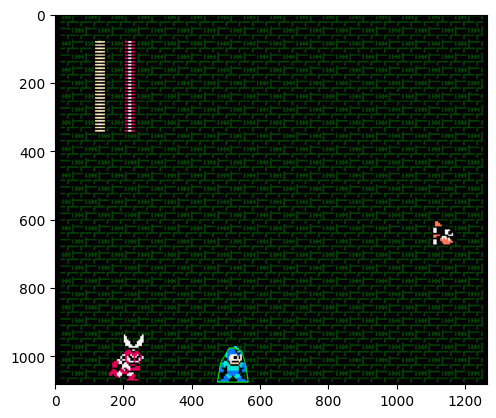

In [40]:
find_megaman('../Pictures/mm1.png')

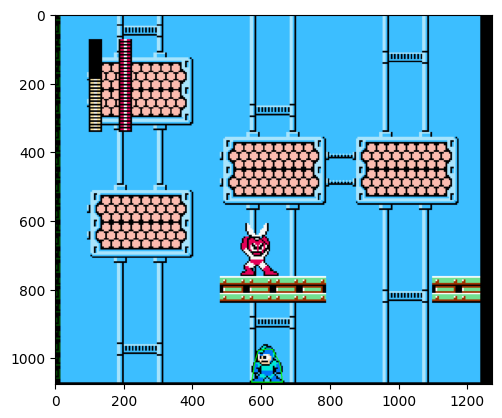

In [41]:
find_megaman('../Pictures/mm2.png')

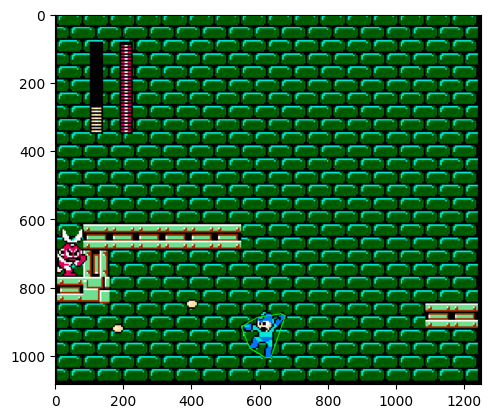

In [42]:
find_megaman('../Pictures/mm3.png')

## MEGAMAN 4

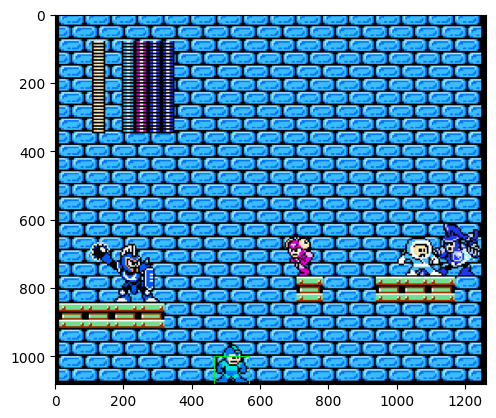

In [40]:
img = cv2.imread("../Pictures/mm4.png")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)

kernel = np.ones((20, 20), np.uint8) 

# Perform the opening operation
opened_image = cv2.morphologyEx(hsv, cv2.MORPH_OPEN, kernel)
lower_cyan = np.array([80, 200, 200])
upper_cyan = np.array([100, 255, 255])

cyan_mask = cv2.inRange(opened_image, lower_cyan, upper_cyan)

filter_img = cv2.bitwise_and(opened_image, opened_image, mask=cyan_mask)

contorns, _ = cv2.findContours(cyan_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

merged_contour = np.concatenate(contorns)

epsilon = 0.01 * cv2.arcLength(merged_contour, True)
approximated_contour = cv2.approxPolyDP(merged_contour, epsilon, True)

hull = cv2.convexHull(approximated_contour)

x, y, w, h = cv2.boundingRect(hull)

scale_factor = 3
new_x = int(x - (scale_factor - 1) * w / 2)
new_y = int(y - (scale_factor - 1) * h / 2)
new_w = int(w * scale_factor)
new_h = int(h * scale_factor)


image_with_merged_contour = cv2.rectangle(img.copy(), (new_x, new_y), (new_x + new_w, new_y + new_h), (0, 255, 0), 2)

plt.imshow(image_with_merged_contour)
plt.show()

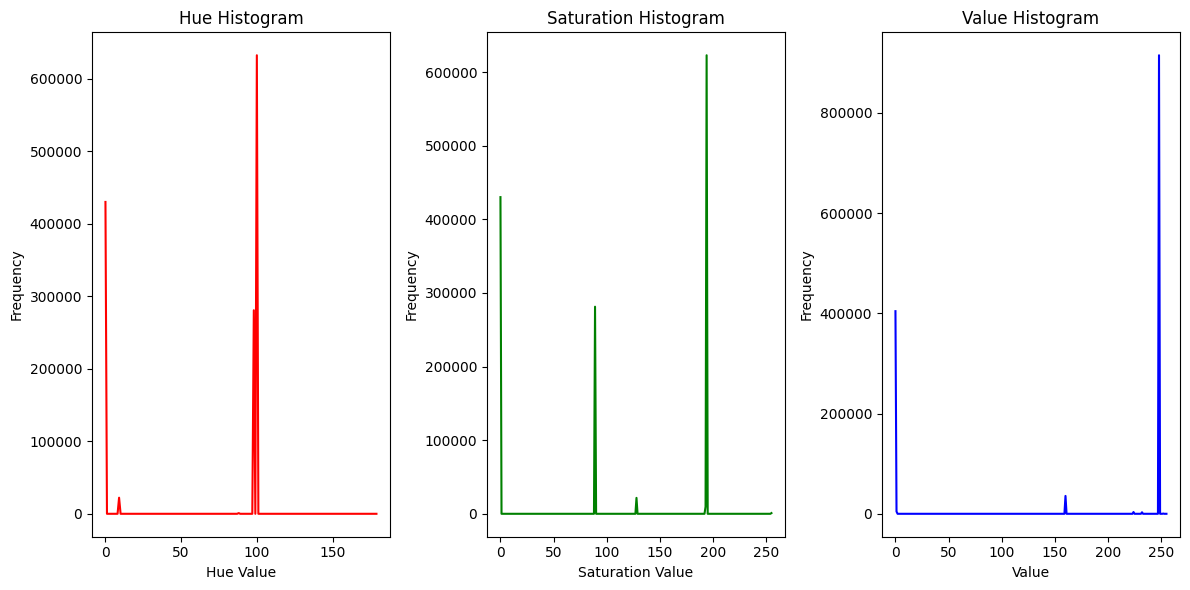

In [8]:
# Calculate the histogram for each channel (Hue, Saturation, Value)
h_hist = cv2.calcHist([opened_image], [0], None, [180], [0, 180])
s_hist = cv2.calcHist([opened_image], [1], None, [256], [0, 256])
v_hist = cv2.calcHist([opened_image], [2], None, [256], [0, 256])

# Plot the histograms
plt.figure(figsize=(12, 6))

plt.subplot(131)
plt.plot(h_hist, color='r')
plt.title('Hue Histogram')
plt.xlabel('Hue Value')
plt.ylabel('Frequency')

plt.subplot(132)
plt.plot(s_hist, color='g')
plt.title('Saturation Histogram')
plt.xlabel('Saturation Value')
plt.ylabel('Frequency')

plt.subplot(133)
plt.plot(v_hist, color='b')
plt.title('Value Histogram')
plt.xlabel('Value')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

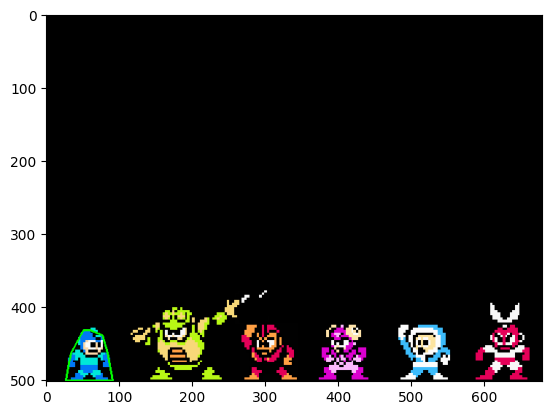

In [44]:
find_megaman('../Pictures/mmboss.png')

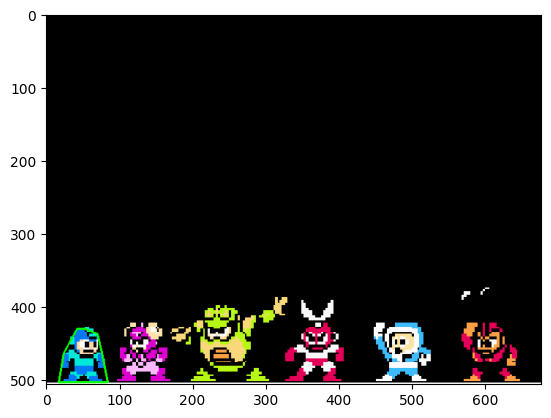

In [45]:
find_megaman('../Pictures/mmboss2.png')